In [1]:
import numpy as np
import sep
import astropy
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits


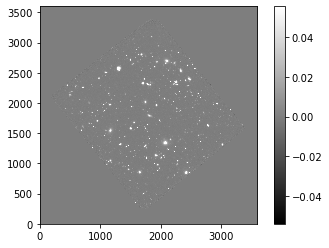

In [2]:
image_file = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = fits.getdata(image_file, ext=0)
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("105wimage.png")

Imports "image.file" file and shows image

In [3]:
dataByteSwapped = data.byteswap(False).newbyteorder()
bkg = sep.Background(dataByteSwapped)

Isoplate background

In [4]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


Get mean and noise/error

In [5]:
bkg_image = bkg.back()

Make bkg into 2d array for plt

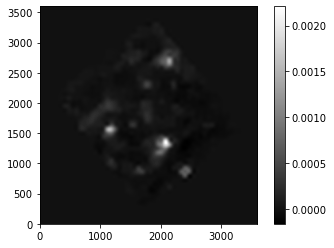

In [6]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("105wbackground.png")

Show the background

In [7]:
bkg_rms = bkg.rms()

Get noise/error of background

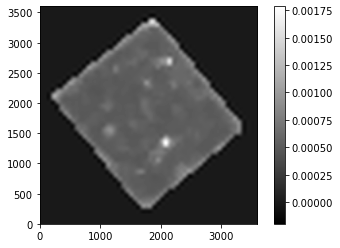

In [8]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("105wbackgroundNoise.png")

Show background Noise

In [9]:
data_sub = data - bkg

Remove background

In [10]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

Find object that are not in background noie

In [11]:
len(objects)

8646

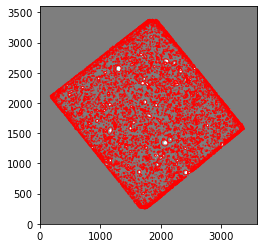

In [12]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("105wbackgroundAndEllipse.png")

Plot ellipse around each object over background img

In [13]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [14]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

Calculate Flux

In [19]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


807.2972835731507


(array([8.643e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -1.06136543,  79.77449947, 160.61036437, 241.44622927,
        322.28209417, 403.11795907, 483.95382397, 564.78968887,
        645.62555377, 726.46141867, 807.29728357]),
 <a list of 10 Patch objects>)

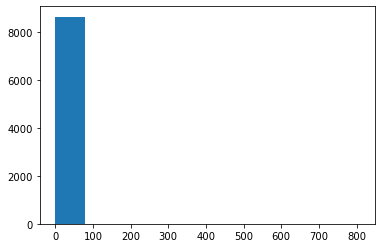

In [16]:
maxFlux = max(flux)
minFlux = min(flux)
print(max(flux))
plt.hist(flux, range = [minFlux, maxFlux], bins=10)

Find histogram

In [17]:
mean = np.mean(flux)
median = np.median(flux)
std = np.std(flux)

print(f"Mean of flux: {mean}")
print(f"Median of flux: {median}")
print(f"Standard Deviation of flux: {std}")


outlier = max(flux)

print(f"Bigget outlier: {outlier}")
numStdsFromMean = (outlier - mean)/std

print(f"Outlier is : {numStdsFromMean} standard deviations away from mean")


Mean of flux: 0.36159539075495284
Median of flux: 0.03097589430617518
Standard Deviation of flux: 9.24028235192194
Bigget outlier: 807.2972835731507
Outlier is : 87.32803365197564 standard deviations away from mean


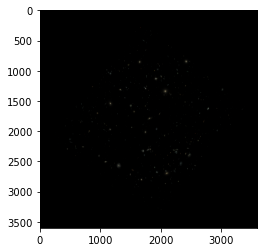

In [18]:
from astropy.visualization import make_lupton_rgb
rFile = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
R = fits.getdata(rFile)
gFile = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
G = fits.getdata(gFile)

bFile = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
B = fits.getdata(bFile)
imgRgb = make_lupton_rgb(R, G, B, Q=10, stretch=0.5, filename="160w125w105wrgbImg.png")
plt.imshow(imgRgb)
